In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
%matplotlib inline

### Tratando resultados FINAIS 

##### Parte 1: Carregando arquivos

In [2]:
results  = pd.read_csv('./memory-results/results_130820.csv', sep=';')

In [3]:
results.head()

,file name,representation,max res,memory,pct refine
0,/Users/nicolas/Documents/ime/compmus/mestrado/...,economic 200,512,6017920,14.830827067669173
1,/Users/nicolas/Documents/ime/compmus/mestrado/...,economic 500,512,5750312,23.235294117647058
2,/Users/nicolas/Documents/ime/compmus/mestrado/...,economic 800,512,5727424,29.05405405405405
3,/Users/nicolas/Documents/ime/compmus/mestrado/...,economic 1600,512,5583992,42.5925925925926
4,/Users/nicolas/Documents/ime/compmus/mestrado/...,economic 200,1024,6017920,14.830827067669173


In [4]:
results = results.drop(['pct refine'], axis=1)

In [5]:
res = results.groupby(['representation', 'max res'], as_index=False).mean()

In [6]:
res

,representation,max res,memory
0,CQT,512,1.075248e+06
1,CQT,1024,1.488688e+06
2,CQT,2048,2.315568e+06
3,CQT,4096,4.382768e+06
4,CQT,8192,8.103728e+06
...,...,...,...
65,economic 800,2048,5.701427e+06
66,economic 800,4096,5.693145e+06
67,economic 800,8192,5.719194e+06
68,economic 800,16384,5.768064e+06


In [7]:
our_16 = res[res['representation'] == 'economic 1600']
our_16 = our_16.groupby(['max res']).mean()

our_8 = res[res['representation'] == 'economic 800']
our_8 = our_8.groupby(['max res']).mean()

our_5 = res[res['representation'] == 'economic 500']
our_5 = our_5.groupby(['max res']).mean()

our_2 = res[res['representation'] == 'economic 200']
our_2 = our_2.groupby(['max res']).mean()

our_2lvl = res[res['representation'] == 'economic 2 lvl']
our_2lvl = our_2lvl.groupby(['max res']).mean()

our_3lvl = res[res['representation'] == 'economic 3 lvl']
our_3lvl = our_3lvl.groupby(['max res']).mean()

our_4lvl = res[res['representation'] == 'economic 4 lvl']
our_4lvl = our_4lvl.groupby(['max res']).mean()

In [8]:
stft = res[res['representation'] == 'STFT']
stft = stft.groupby(['max res']).mean()

cqt = res[res['representation'] == 'CQT']
cqt = cqt.groupby(['max res']).mean()

swgm = res[res['representation'] == 'SWGM']
swgm = swgm.groupby(['max res']).mean()

##### Parte 2: Gráficos

In [9]:
resolutions = [512,1024,2048,4096,8192,16384,32768]

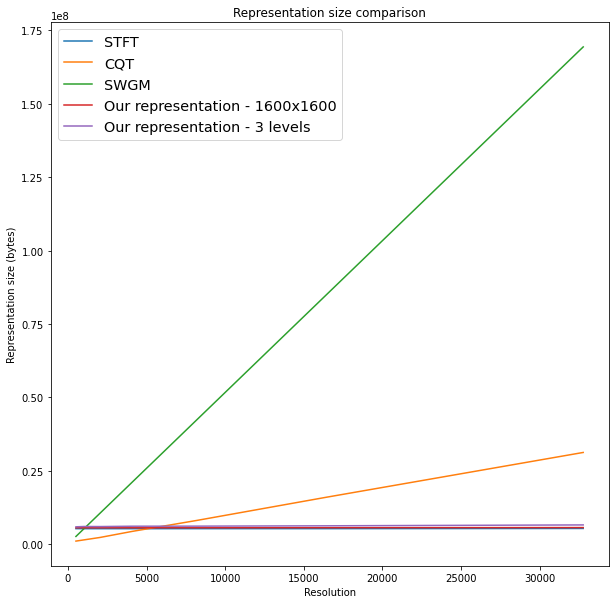

In [10]:
plt.figure(figsize=[10,10])
plt.plot(resolutions, stft, label='STFT')
plt.plot(resolutions, cqt, label='CQT')
plt.plot(resolutions, swgm, label='SWGM')
plt.plot(resolutions, our_16, label='Our representation - 1600x1600')
plt.plot(resolutions, our_3lvl, label='Our representation - 3 levels')

plt.xlabel('Resolution')
plt.ylabel('Representation size (bytes)')
plt.title('Representation size comparison')

plt.legend(fontsize='x-large')

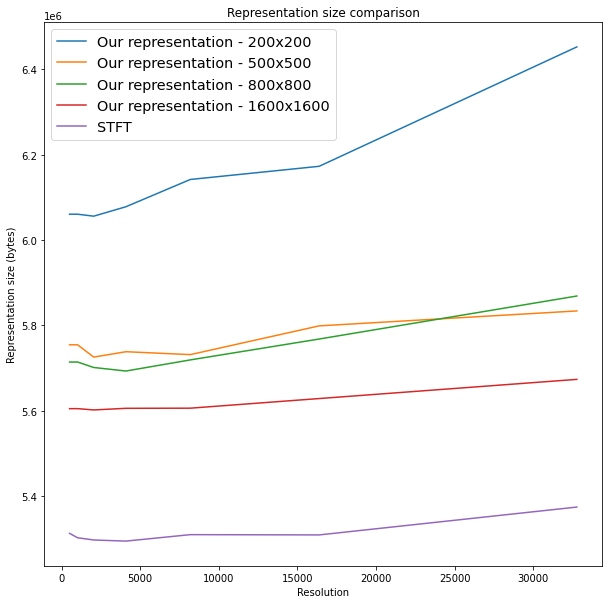

In [11]:
plt.figure(figsize=[10,10])
plt.plot(resolutions, our_2, label='Our representation - 200x200')
plt.plot(resolutions, our_5, label='Our representation - 500x500')
plt.plot(resolutions, our_8, label='Our representation - 800x800')
plt.plot(resolutions, our_16, label='Our representation - 1600x1600')
plt.plot(resolutions, stft, label='STFT')

plt.xlabel('Resolution')
plt.ylabel('Representation size (bytes)')
plt.title('Representation size comparison')

plt.legend(fontsize='x-large')

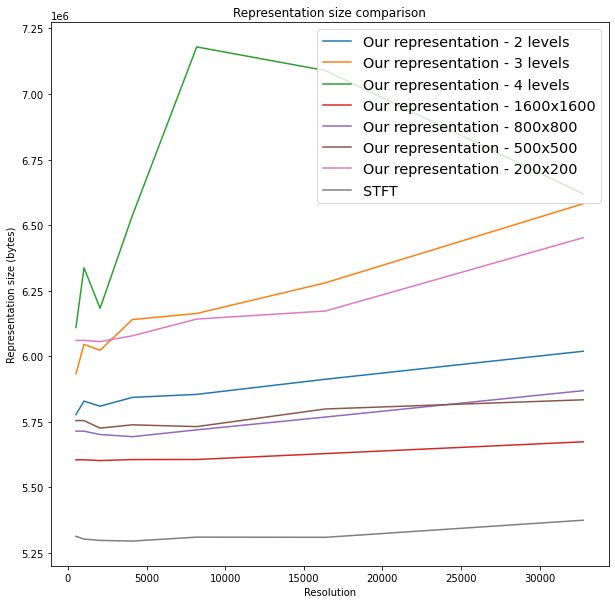

In [12]:
plt.figure(figsize=[10,10])
plt.plot(resolutions, our_2lvl, label='Our representation - 2 levels')
plt.plot(resolutions, our_3lvl, label='Our representation - 3 levels')
plt.plot(resolutions, our_4lvl, label='Our representation - 4 levels')
plt.plot(resolutions, our_16, label='Our representation - 1600x1600')
plt.plot(resolutions, our_8, label='Our representation - 800x800')
plt.plot(resolutions, our_5, label='Our representation - 500x500')
plt.plot(resolutions, our_2, label='Our representation - 200x200')
plt.plot(resolutions, stft, label='STFT')

plt.xlabel('Resolution')
plt.ylabel('Representation size (bytes)')
plt.title('Representation size comparison')

plt.legend(fontsize='x-large')

Text(0, 0.5, 'Representation size (bytes)')

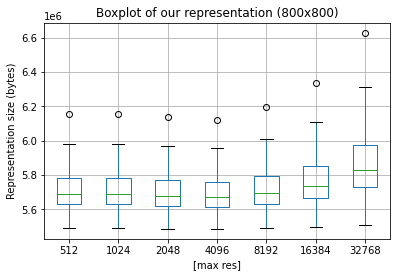

In [16]:
our_800 = results[results['representation'] == 'economic 800']
our_800.boxplot(by='max res')
plt.title('Boxplot of our representation (800x800)')
plt.ylabel('Representation size (bytes)')

In [ ]:
our_800 = results[results['representation'] == 'economic 3 lvl']
our_800.boxplot(by='max res')